#**Import Libraries**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

#**Data Collecting and Cleaning**

In [77]:
stroke_data=pd.read_csv("stroke_data.csv")

In [78]:
stroke_data.isna().sum()
print((stroke_data.isna().sum()/len(stroke_data))*100)
stroke_data.dropna(how='any', inplace=True)



gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
avg_glucose_level    0.0
bmi                  2.5
smoking_status       0.0
stroke               0.0
dtype: float64


#**Data Visualising**

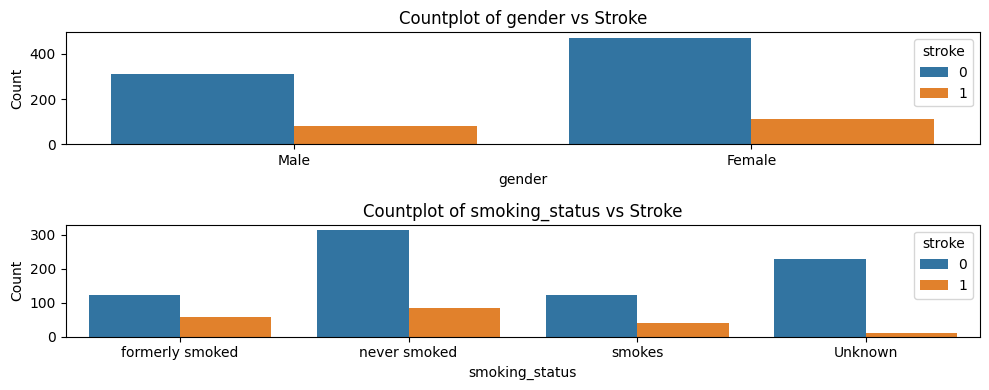

In [79]:
# Categorical columns to visualize
categorical_columns = ['gender', 'smoking_status']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 2 * len(categorical_columns)))

# Plot count plots for each categorical column
for col, ax in zip(categorical_columns, axes):
    sns.countplot(x=col, hue='stroke', data=stroke_data, ax=ax)
    ax.set_title(f'Countplot of {col} vs Stroke')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


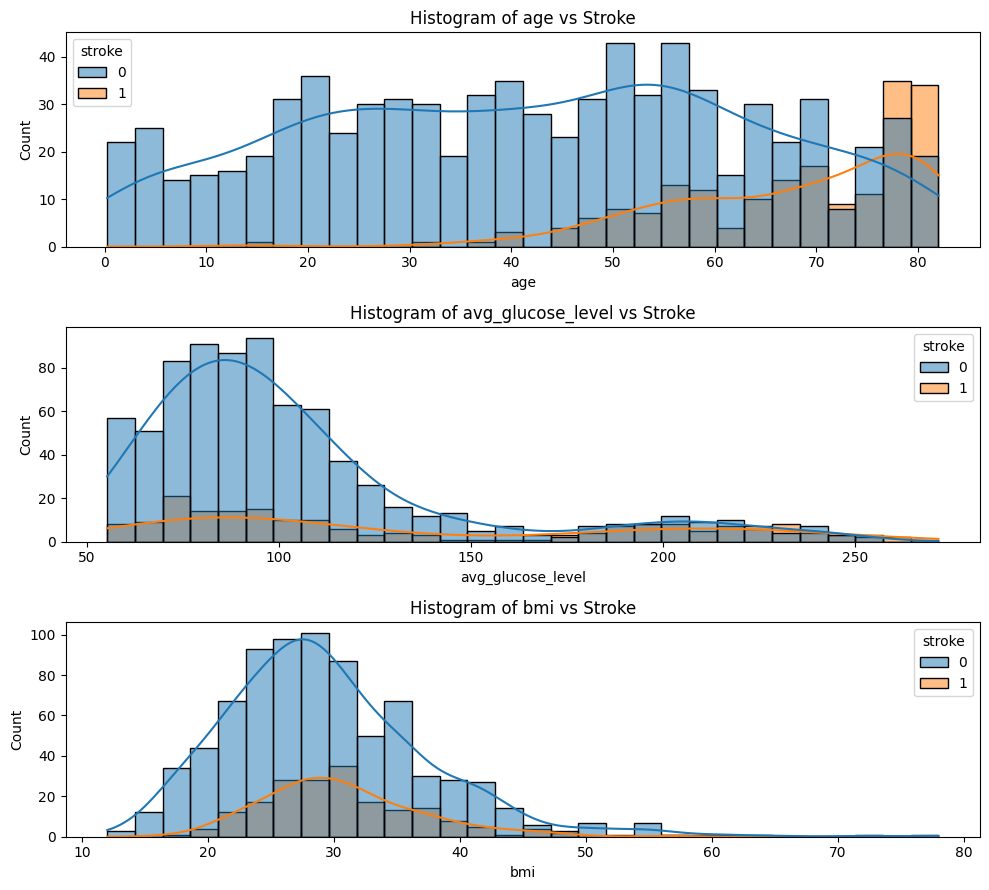

In [80]:
# Numerical columns to visualize
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 3 * len(numerical_columns)))

# Plot histograms for each numerical column
for col, ax in zip(numerical_columns, axes):
    sns.histplot(x=col, hue='stroke', data=stroke_data, kde=True, ax=ax, bins=30)
    ax.set_title(f'Histogram of {col} vs Stroke')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


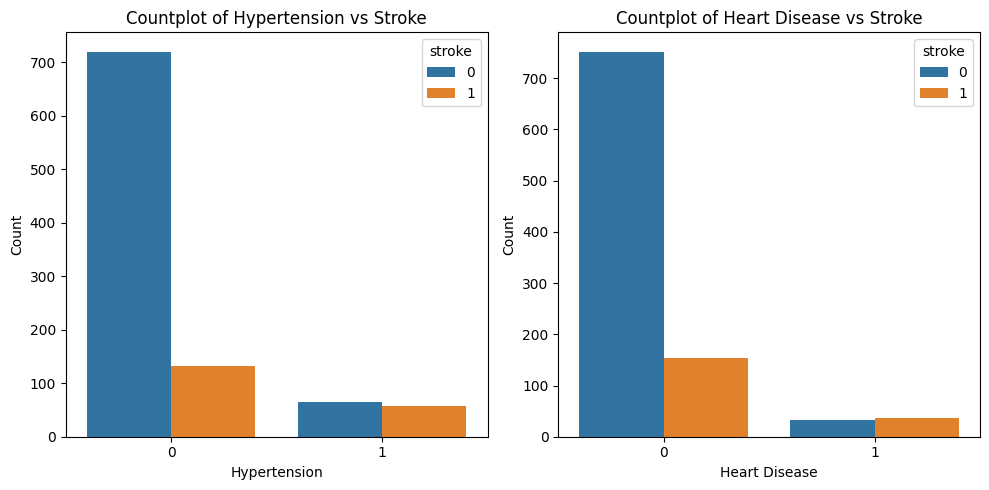

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(x='hypertension', hue='stroke', data=stroke_data, ax=axes[0])
axes[0].set_title('Countplot of Hypertension vs Stroke')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')

sns.countplot(x='heart_disease', hue='stroke', data=stroke_data, ax=axes[1])
axes[1].set_title('Countplot of Heart Disease vs Stroke')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


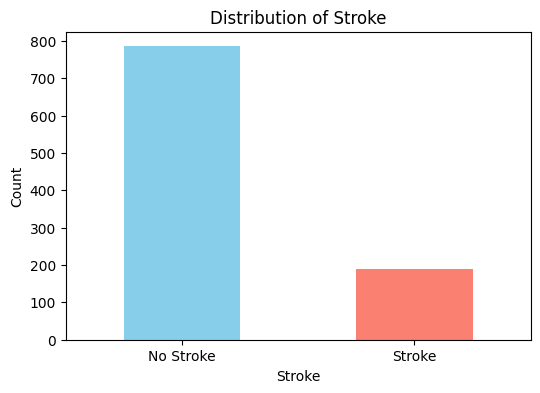

In [82]:
import matplotlib.pyplot as plt

# Assuming stroke_data is your DataFrame
stroke_counts = stroke_data['stroke'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')

# Corrected xticks with ticks parameter
plt.xticks(rotation=0, ticks=[0, 1], labels=['No Stroke', 'Stroke'])
plt.show()


#**Data Preprocessing**

In [83]:
# One-hot encode categorical columns
stroke_data = pd.get_dummies(stroke_data, columns=categorical_columns)


In [84]:
# Assuming stroke_data is your DataFrame
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']

# Specify train_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#**Model Building**

In [86]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

In [87]:
# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [88]:
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

#**Model Evaluation**

In [89]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       163
           1       0.31      0.16      0.21        32

    accuracy                           0.81       195
   macro avg       0.58      0.54      0.55       195
weighted avg       0.76      0.81      0.78       195



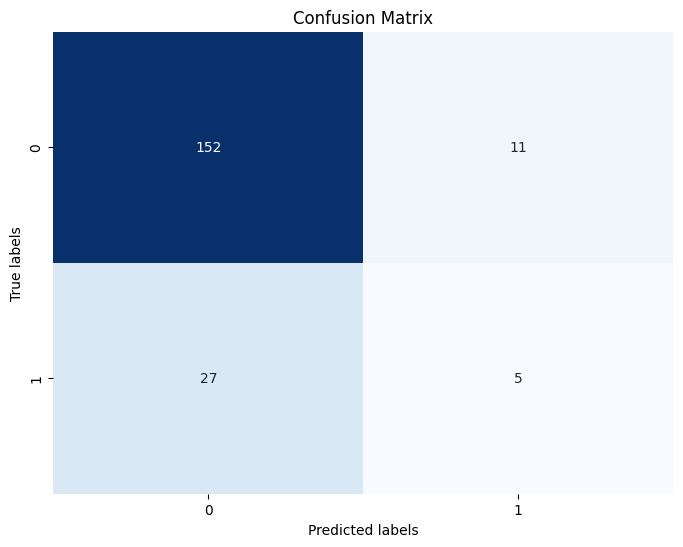

In [90]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [91]:
print(accuracy_score(y_test, y_pred))


0.8051282051282052
